## we will build a convolutional neural network that is able to classify categories of the clothes.

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

## STEP 1: IMPORT THE DATA
Use the functions below to load your data into training and test sets.

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

### There are 10 classes (targets) in this dataset listed from 0 to 9. We can describe the labels as below:


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


## STEP 2: VISUALIZE THE DATA AND PREPROCESS DATA
Using the shape function, find out the size and the number of the images in each set.
As we mentioned previously, the data is not normalized, thus we need to normalize the images before processing. 
You can normalize the data by simply dividing the sets by 255.


In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
test_images.shape

(10000, 28, 28)

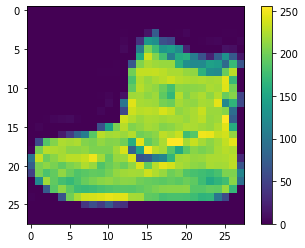

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
train_images = train_images / 255.0

test_images = test_images / 255.0

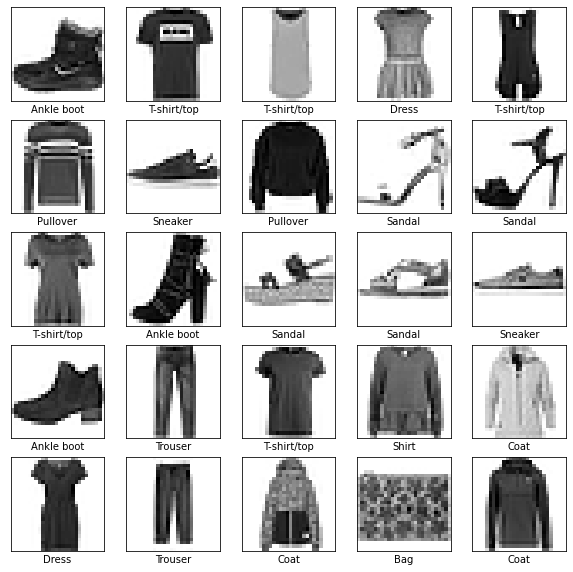

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

## STEP 3: SETUP YOUR NETWORK
Deep neural networks is made up of several Layers. The higher the number of layers, the deeper the network. 
For this task we will use a sequential model with layers:
1. Flatten layer for input (size of the image): transform images to 1-d array
2. Dense layer (128 neurons, Relu) : Also known as fully connected layer with relu activation
3. Dense Layer (Number of classes, softmax): returns the probability of each target with softmax activation

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## STEP 4: TRAIN YOUR NETWORK

In [11]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 5ms/step - loss: 0.4924 - accuracy: 0.8267
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3728 - accuracy: 0.8655
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3372 - accuracy: 0.8769
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3100 - accuracy: 0.8862
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2948 - accuracy: 0.8908
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2800 - accuracy: 0.8961
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2677 - accuracy: 0.9003
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2575 - accuracy: 0.9038
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2480 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.23

## STEP 5: EVALUATE
To evaluate the accuracy, use the function model. Evaluate and pass the test sets. The function returns test loss 
and test accuracy respectively.

In [12]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3488 - accuracy: 0.8774 - 728ms/epoch - 2ms/step

Test accuracy: 0.8773999810218811


Make predictions

In [20]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

HELPER FUNCTIONS

In [21]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verify Predictions

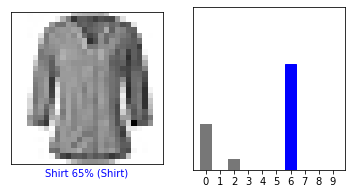

In [22]:
i = 4
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

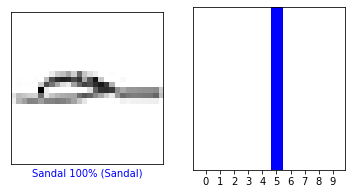

In [23]:
i = 8
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

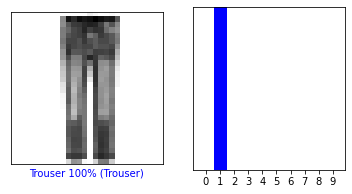

In [24]:
i = 15
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

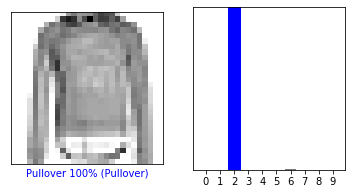

In [25]:
i = 16
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

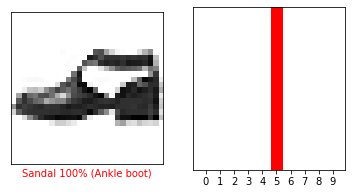

In [26]:
i = 23
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()